In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.ensemble import IsolationForest
rs = np.random.RandomState(0)

warnings.filterwarnings('ignore')
# pd.reset_option('^display.', silent=True)

In [16]:
## 데이터셋 ##

X_train = pd.read_excel('data/bolt_train.xlsx', index_col='wheel_id')
X_test = pd.read_excel('data/bolt_test.xlsx', index_col='wheel_id')

In [17]:
## 학습 ##
def train_and_predict_if(df, feature):
    clf = IsolationForest(max_samples=200, random_state=rs)
    clf.fit(df[[feature]])
    pred = clf.predict(df[[feature]])
    scores = clf.decision_function(df[[feature]])
    stats = pd.DataFrame()
    stats['val'] = df[feature]
    stats['score'] = scores
    stats['outlier'] = pred 
    stats['min'] = df[feature].min()
    stats['max'] = df[feature].max()
    stats['mean'] = df[feature].mean()
    stats['feature'] = [feature] * len(df)
    return stats

# Helper function to print outliers
def print_outliers(df, feature, n):
    print(feature)
    print(df[feature].head(n).to_string(), "\n")


In [18]:
columns = list(X_train.columns)
result = pd.DataFrame()

for feature in columns:
    stats = train_and_predict_if(X_train, feature)
    result = pd.concat([result, stats])

In [19]:
# Gather top outliers for each feature
outliers = {team:grp.drop('feature', axis=1) 
       for team, grp in result.sort_values(by='score').groupby('feature')}

In [20]:
# Print the top 10 outlier samples for a few selected features
n_outliers = 5
# print_outliers(outliers, "broken", n_outliers)
# print_outliers(outliers, "loose", n_outliers)
print_outliers(outliers, "lost", n_outliers)

lost
          val     score  outlier  min  max      mean
wheel_id                                            
486        33 -0.343060       -1    1   33  7.493014
106        20 -0.303358       -1    1   33  7.493014
14         17 -0.266809       -1    1   33  7.493014
444        16 -0.247285       -1    1   33  7.493014
501         1 -0.142195       -1    1   33  7.493014 



<Axes: >

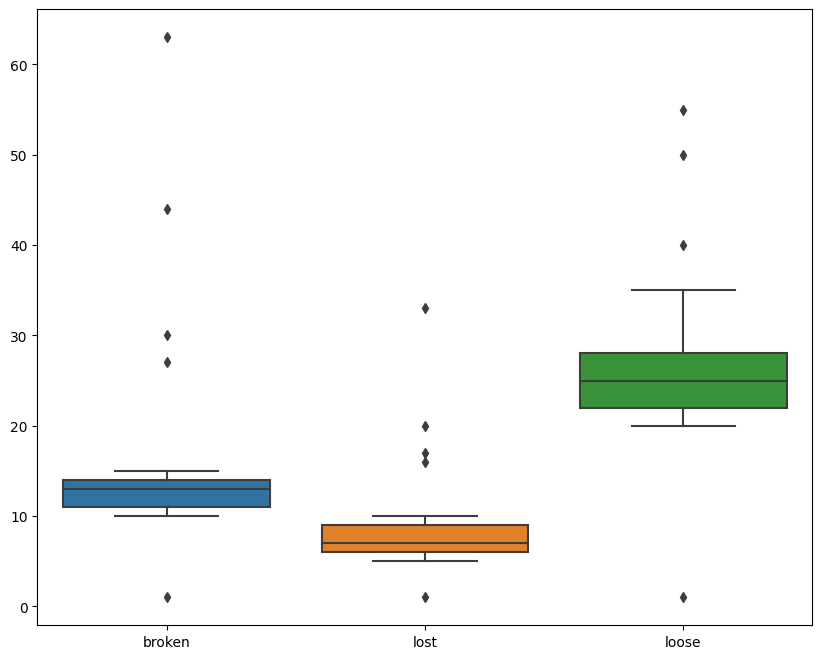

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_train)

# 모든 feature 합쳐서

In [64]:
from sklearn.ensemble import IsolationForest

contamination = 1 / len(X_train)
clf = IsolationForest(max_samples=len(X_train), random_state=0, contamination=contamination)
# clf = IsolationForest(max_samples=len(X_train), random_state=0)
clf.fit(X_train)

IsolationForest(contamination=0.002, max_samples=500, random_state=0)

In [69]:
pred = clf.predict(X_train)
scores = clf.decision_function(X_train)

In [70]:
pred = pd.Series(pred, name='pred', index=range(1, len(X_train)+1))
scores = pd.Series(scores, name='scores', index=range(1, len(X_train)+1))

In [71]:
result = pd.concat([X_train, pred, scores], axis=1)

In [72]:
result['scores'].sum()

161.62797469625508

In [73]:
result.sort_values('scores')[:30]

,broken,lost,loose,pred,scores
136,63,5,30,-1,-0.048306
486,14,33,29,1,0.000097
208,10,10,50,1,0.006256
130,11,10,55,1,0.010919
179,44,5,25,1,0.030487
106,11,20,20,1,0.046649
18,30,8,25,1,0.088200
14,10,17,21,1,0.088942
487,13,7,40,1,0.096775
444,15,16,22,1,0.115336


In [18]:
temp = pd.DataFrame(
    {
        'lost': [7],
        'loose': [2],
        'broken': [2],
    }
)

In [ ]:
clf.predict(temp)

In [3]:
from anormal import check_anormal

In [19]:
temp

,lost,loose,broken
0,7,2,2


In [20]:
check_anormal(temp)

'문제 있음!'

In [2]:
WHEELS = [
    {   
        'wheel1': 'w1',
        'lost': 1,
        'loose': 2,
        'broken': 3,
    },
    {   
        'wheel2': 'w2',
        'lost': 1,
        'loose': 2,
        'broken': 3,
    },
    {
        'wheel3': 'w3',
        'lost': 1,
        'loose': 2,
        'broken': 3,
    },
    {
        'wheel4': 'w4',
        'lost': 1,
        'loose': 2,
        'broken': 3,
    }
]

In [5]:
import pandas as pd

In [7]:
WHEELS[0]

{'wheel1': 'w1', 'lost': 1, 'loose': 2, 'broken': 3}

In [11]:
pd.DataFrame({
    'a': [1],
    'b': [2]
})

,a,b
0,1,2


In [12]:
pd.DataFrame([WHEELS[0]], index=)

,wheel1,lost,loose,broken
0,w1,1,2,3
